In [8]:
import os           
import random       

import numpy as np   
import pandas as pd  

from skimage import io 

from sklearn.model_selection import train_test_split   
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt        
import seaborn as sns

In [9]:
def matrix_confusion(yt, yp):
    data = {'Y_Real': yt,
            'Y_Prediccion': yp}

    df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
    confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, fmt='g')

    plt.show()

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/ClassificadorCancerEsofago/master/Datos/ClasesImagenes.csv", usecols=[1,2])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filename  5063 non-null   object
 1   class_number    5063 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 79.2+ KB


In [12]:
data['class_number'].value_counts(sort=False)  

class_number
0    1469
1    3594
Name: count, dtype: int64

In [13]:
Y = data['class_number']

In [14]:
data['image_filename']

0          im_4_0.png
1         im_21_0.png
2          im_9_0.png
3          im_8_0.png
4         im_15_0.png
            ...      
5058    im_114_55.png
5059      im_7_55.png
5060     im_52_55.png
5061     im_10_55.png
5062    im_111_55.png
Name: image_filename, Length: 5063, dtype: object

In [15]:
path = "C:\\Users\\venka\\OneDrive\\Documents\\dataset\\"

In [16]:
%time  img = data['image_filename'].apply(lambda x: io.imread(path + x, as_gray=True))

CPU times: total: 54.2 s
Wall time: 2min 40s


In [17]:
img.shape

(5063,)

In [18]:
img[0].shape

(260, 260)

In [19]:
IMG = np.stack(img, axis=0)    
IMG.shape

(5063, 260, 260)

In [20]:
X = IMG.reshape(5063, -1)
X.shape

(5063, 67600)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                    shuffle=True, random_state=0)

In [22]:
print("Training set")
print("X: ", X_train.shape)
print("Y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Healthy Tissue:        ', counts[0],'\nCancer: ', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("Y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Healthy Tissue:         ', counts[0],'\nCancer: ', counts[1],'\n')

Training set
X:  (3544, 67600)
Y:  (3544,)
Healthy Tissue:         1043 
Cancer:  2501 

Test set
X:  (1519, 67600)
Y:  (1519,)
Healthy Tissue:          426 
Cancer:  1093 



In [23]:
model_p = Perceptron(max_iter=50, random_state=0, verbose=True)
model_p.fit(X_train,y_train)             

-- Epoch 1
Norm: 1123.26, NNZs: 67600, Bias: -39.000000, T: 3544, Avg. loss: 1641.286726
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 1709.08, NNZs: 67600, Bias: -56.000000, T: 7088, Avg. loss: 1415.700003
Total training time: 1.81 seconds.
-- Epoch 3
Norm: 2155.80, NNZs: 67600, Bias: -69.000000, T: 10632, Avg. loss: 1231.936834
Total training time: 2.32 seconds.
-- Epoch 4
Norm: 2616.13, NNZs: 67600, Bias: -76.000000, T: 14176, Avg. loss: 1124.851144
Total training time: 2.85 seconds.
-- Epoch 5
Norm: 3021.59, NNZs: 67600, Bias: -75.000000, T: 17720, Avg. loss: 1133.721658
Total training time: 3.50 seconds.
-- Epoch 6
Norm: 3379.11, NNZs: 67600, Bias: -74.000000, T: 21264, Avg. loss: 971.851823
Total training time: 4.39 seconds.
-- Epoch 7
Norm: 3724.07, NNZs: 67600, Bias: -66.000000, T: 24808, Avg. loss: 937.594908
Total training time: 4.90 seconds.
-- Epoch 8
Norm: 4026.70, NNZs: 67600, Bias: -68.000000, T: 28352, Avg. loss: 855.373414
Total training time: 5.35 seconds.
-- Ep

Perceptron(max_iter=50, verbose=True)

In [24]:
print("Train Set Accuracy: %.2f%%" % (model_p.score(X_train, y_train)*100.0))
print("Test Set Accuracy: %.2f%%" % (model_p.score(X_test, y_test)*100.0))

Train Set Accuracy: 95.49%
Test Set Accuracy: 90.19%


In [25]:
y_pred = model_p.predict(X_test) 

In [26]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy: 90.19%


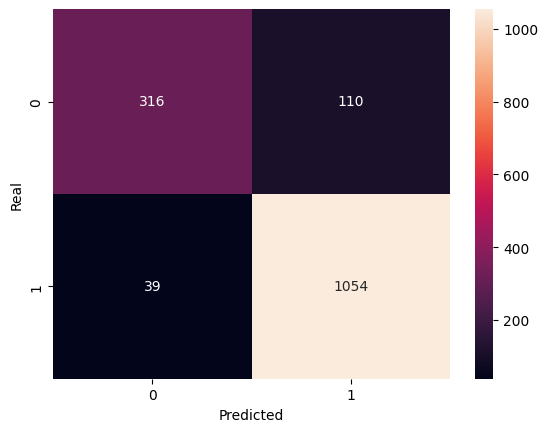

In [27]:
matrix_confusion(y_test, y_pred)

In [28]:
model_mp = Perceptron(max_iter=1000, random_state=0, verbose=False, alpha=0.0001) 
model_mp.fit(X_train,y_train)                                  

print("Train Set Accuracy: %.2f%%" % (model_mp.score(X_train, y_train)*100.0))
print("Test Set Accuracy: %.2f%%" % (model_mp.score(X_test, y_test)*100.0))

Train Set Accuracy: 95.49%
Test Set Accuracy: 90.19%


In [29]:
y_pred = model_mp.predict(X_test)

In [30]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy: 90.19%


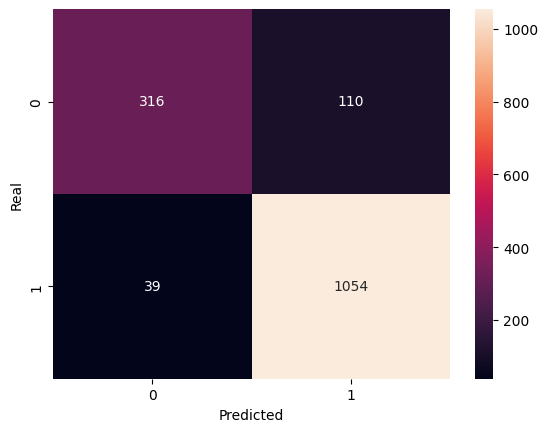

In [31]:
matrix_confusion(y_test, y_pred)

In [32]:
model_mp1 = Perceptron(max_iter=1000,  random_state=0, verbose=False, alpha=0.000001, penalty='l2') # Adds L2 penalty
model_mp1.fit(X_train,y_train) 

print("Train Set Accuracy: %.2f%%" % (model_mp1.score(X_train, y_train)*100.0))
print("Test Set Accuracy: %.2f%%" % (model_mp1.score(X_test, y_test)*100.0))

Train Set Accuracy: 98.59%
Test Set Accuracy: 92.03%


In [33]:
y_pred = model_mp1.predict(X_test)  #pasa cada una de las imágenes de X_test por el modelo

In [34]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy: 92.03%


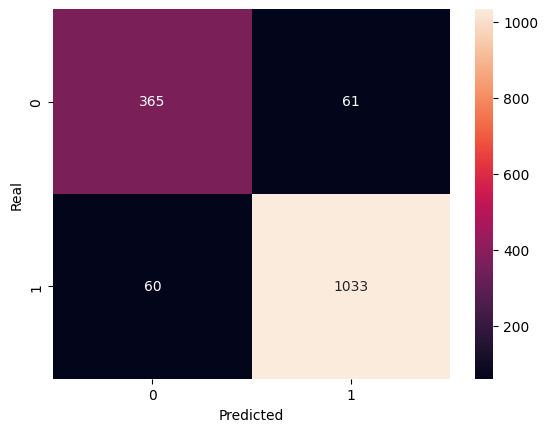

In [35]:
matrix_confusion(y_test, y_pred)

In [36]:
import torch, torchvision, torch.utils
from torch import Tensor
from torch import cat
from torch.autograd.grad_mode import no_grad
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss, BCELoss, CrossEntropyLoss, MSELoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
from qiskit import QuantumCircuit; qc = QuantumCircuit
#from qiskit import QuantumCircuit  # Import QuantumCircuit from qiskit (if needed)
from qiskit_aer import Aer
import numpy as np
import torch
from torch.nn import Module, Conv2d, Dropout2d, Linear, functional as F
from torch import optim, cat, no_grad
from torchsummary import summary
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.connectors import TorchConnector
import matplotlib.pyplot as plt


In [37]:
train_data = torchvision.datasets.ImageFolder('C:\\Users\\venka\\OneDrive\\Documents\\Imagenes_Clasificadas_Random_Split\\Train', transform=transforms.Compose([transforms.ToTensor()]))
test_data = torchvision.datasets.ImageFolder('C:\\Users\\venka\\OneDrive\\Documents\\Imagenes_Clasificadas_Random_Split\\Test', transform=transforms.Compose([transforms.ToTensor()]))

In [38]:
train_data[0][0].shape

torch.Size([3, 260, 260])

In [39]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=1)
test_loader = DataLoader(test_data, shuffle=True, batch_size=1)

In [40]:
# False is no cancer (0) and True, yes (1)
print((train_loader.dataset.class_to_idx))

{'False': 0, 'True': 1}


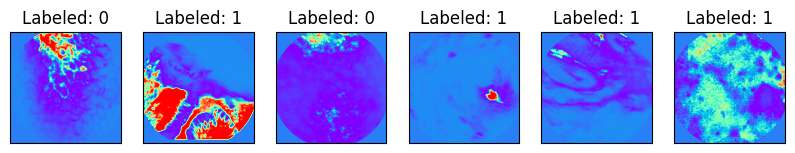

In [41]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 10))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap=plt.cm.rainbow)
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title(f"Labeled: {targets[0].item()}")

    n_samples_show -= 1

In [42]:
import pandas as pd
Acc = pd.read_csv("C:\\Users\\venka\\OneDrive\\Documents\\source.csv",header=None)
class CustomSamplerQNN(SamplerQNN):
    def _forward(self, input_data, weights):
        parameter_values, num_samples = self._preprocess_forward(input_data, weights)
        # Ensure the circuits and parameter values are paired correctly
        circuits = [self._circuit] * num_samples
        # Create a job for running the circuits with parameter values (CPU simulation)
        job = execute(circuits, backend=Aer.get_backend('qasm_simulator'), shots=num_samples)

        # Process the results
        results = job.result()
        probabilities = np.array([results.get_counts(i) for i in range(num_samples)])
        # Normalize probabilities
        probabilities = np.array([np.array(list(counts.values())) / sum(counts.values()) for counts in probabilities])
        return probabilities

sampler = Aer.get_backend('qasm_simulator')  # CPU simulator

def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qnn = CustomSamplerQNN(
        circuit=feature_map.compose(ansatz),
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        sampler=sampler,
    )
    return qnn

qnn = create_qnn()

In [43]:
qnn.circuit.parameters

ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3])])

In [44]:
params = np.random.uniform(-1, 1, len(qnn.circuit.parameters))
params



array([-0.80973462, -0.16689923,  0.82839508,  0.82152551,  0.73535574,
       -0.35823709])

In [45]:
from qiskit.circuit import Parameter

# Assuming qnn.circuit is a ZZFeatureMap object
parameter_dict = {param: val for param, val in zip(qnn.circuit.parameters, params)}
bound_circuit = qnn.circuit.assign_parameters(parameter_dict, inplace=False)

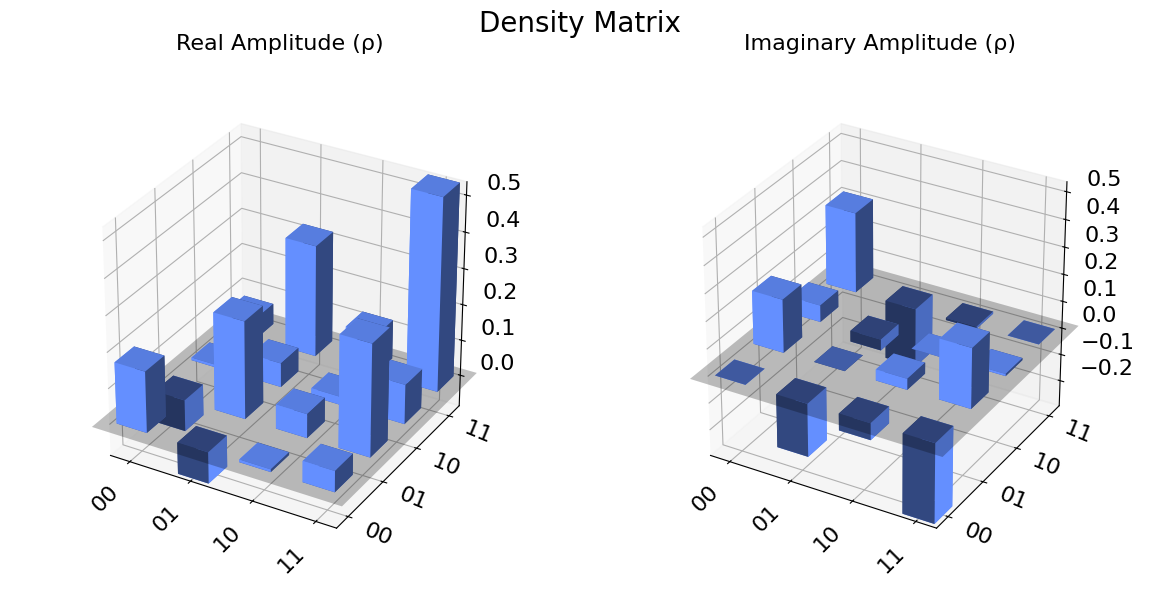

In [46]:
rho_01 = DensityMatrix.from_instruction(bound_circuit)
plot_state_city(rho_01.data, title='Density Matrix', figsize=(12,6))

In [47]:
gamma_p = rho_01.purity()
display(rho_01.draw('latex', prefix='\\rho_p = '))
print("State purity: ", np.round(np.real(gamma_p), 3))

<IPython.core.display.Latex object>

State purity:  1.0


In [48]:
import qiskit

def update_model_with_decomposed_circuit(model, qnn):
    """Decomposes ZZFeatureMap circuit and updates the model."""
    # Decompose the ZZFeatureMap circuit
    qnn.circuit = qnn.circuit.decompose()

    # Update forward pass to use decomposed circuit (CPU execution)
    def new_forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        # Use CPU simulation for qnn
        counts = qnn(x.cpu().detach().numpy())  # Move data to CPU for simulation
        x = torch.tensor(counts, dtype=torch.float)  # Convert counts to tensor
        x = cat((x, 1 - x), -1)
        return x

    model.forward = new_forward


In [49]:
import pandas as pd

class Net(Module):
    def __init__(self, qnn):
        super().__init__()

        self.conv1 = Conv2d(3, 128, kernel_size=5)
        self.conv2 = Conv2d(128, 128, kernel_size=3)
        self.dropout = Dropout2d()
        self.fc1 = Linear(508032, 128)
        self.fc2 = Linear(128, 2)  # QNN binary input
        self.qnn = TorchConnector(qnn)
        self.fc3 = Linear(1, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # Move data to CPU for qnn execution
        x = x.cpu().detach()
        counts = qnn.forward(x.numpy())  # Use CPU simulation for qnn
        x = torch.tensor(counts, dtype=torch.float)  # Convert counts to tensor

        x = cat((x, 1 - x), -1)
        x = self.fc3(x)
        return x

def __del__(self):
    pass  # No OpenCL resources to release

model = Net(qnn)


In [50]:
device = torch.device('cpu')
model = model.to(device)
print(model)


Net(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=508032, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (qnn): TorchConnector()
  (fc3): Linear(in_features=1, out_features=1, bias=True)
)


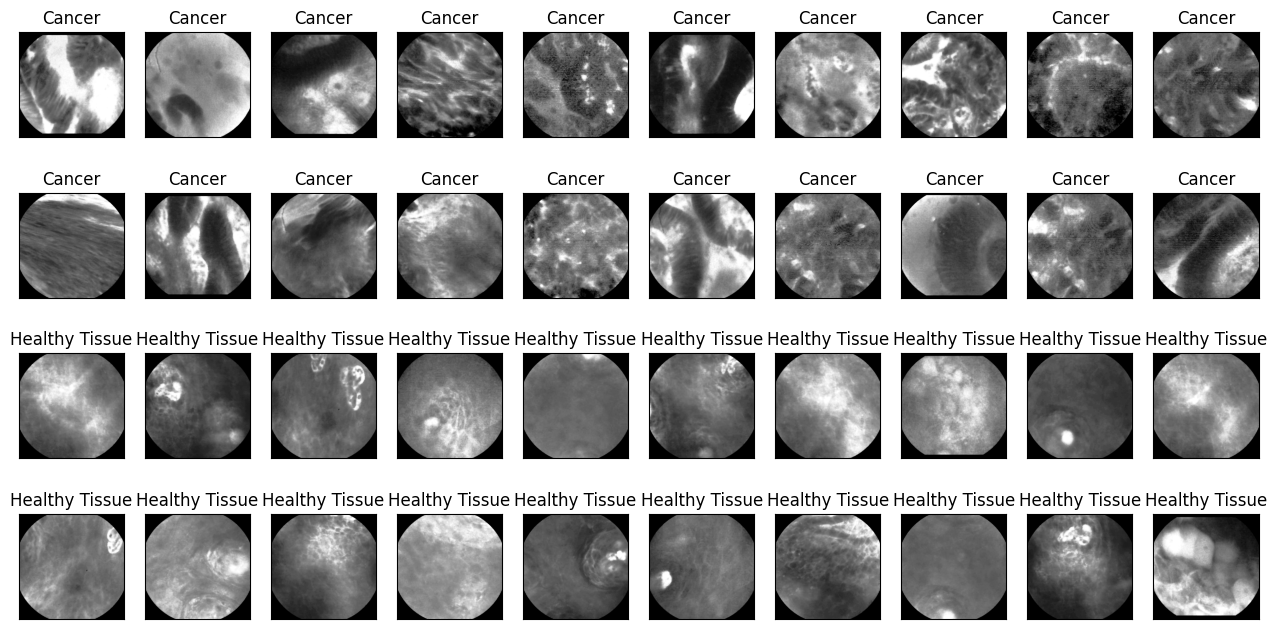

In [54]:
byClass = data.groupby('class_number')

n = 20
c = random.sample(byClass.get_group(1).index.tolist(), n)
s = random.sample(byClass.get_group(0).index.tolist(), n)


fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 4
for i in range(0, columns * rows):
    fig.add_subplot(rows, columns, i+1)
    if i < 20:
        plt.imshow(img[c[i]], cmap='Greys_r')
        plt.title('Cancer')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(img[s[i-20]], cmap='Greys_r')
        plt.title('Healthy Tissue')
        plt.xticks([])
        plt.yticks([])
plt.show()

In [55]:
import qiskit
print(Acc)
def update_model_with_decomposed_circuit(model, qnn):
    """Decomposes ZZFeatureMap circuit and updates the model."""
    # Decompose the ZZFeatureMap circuit
    qnn.circuit = qnn.circuit.decompose()

    # Update forward pass to use decomposed circuit (CPU execution)
    def new_forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        # Use CPU simulation for qnn
        counts = qnn(x.cpu().detach().numpy())  # Move data to CPU for simulation
        x = torch.tensor(counts, dtype=torch.float)  # Convert counts to tensor
        x = cat((x, 1 - x), -1)
        return x

    model.forward = new_forward
    # printing training loss and accuracy
   

                  0             1                 2
0     Training [2%]  Loss: 0.6158  Accuracy: 68.52%
1     Training [4%]  Loss: 0.5503  Accuracy: 77.73%
2     Training [6%]  Loss: 0.5232  Accuracy: 81.34%
3     Training [8%]  Loss: 0.5083  Accuracy: 84.08%
4    Training [10%]  Loss: 0.4688  Accuracy: 85.84%
5    Training [12%]  Loss: 0.4375  Accuracy: 88.73%
6    Training [14%]  Loss: 0.4055  Accuracy: 90.88%
7    Training [16%]  Loss: 0.3808  Accuracy: 93.07%
8    Training [18%]  Loss: 0.3613  Accuracy: 93.83%
9    Training [20%]  Loss: 0.3408  Accuracy: 94.44%
10   Training [22%]  Loss: 0.3255  Accuracy: 94.53%
11   Training [24%]  Loss: 0.3108  Accuracy: 95.59%
12   Training [26%]  Loss: 0.2964  Accuracy: 95.93%
13   Training [28%]  Loss: 0.2775  Accuracy: 96.90%
14   Training [30%]  Loss: 0.2647  Accuracy: 96.84%
15   Training [32%]  Loss: 0.2480  Accuracy: 97.48%
16   Training [34%]  Loss: 0.2389  Accuracy: 97.57%
17   Training [36%]  Loss: 0.2232  Accuracy: 97.81%
18   Trainin

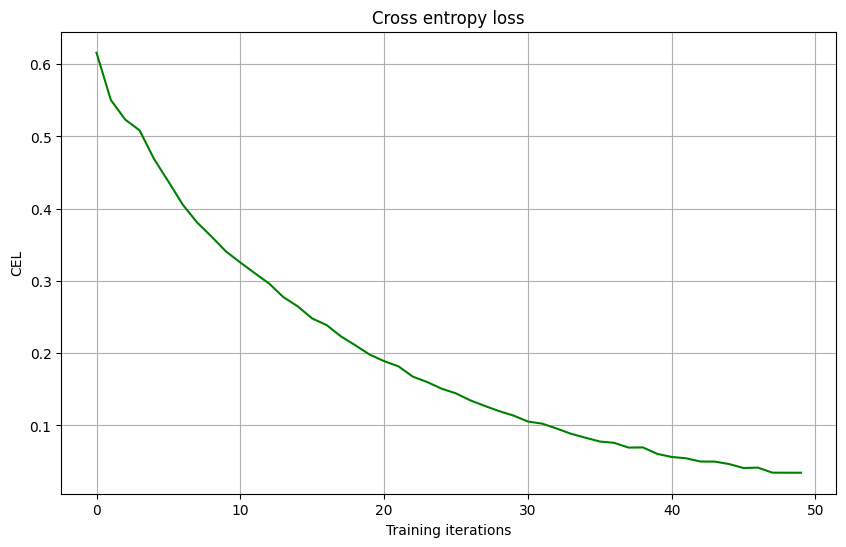

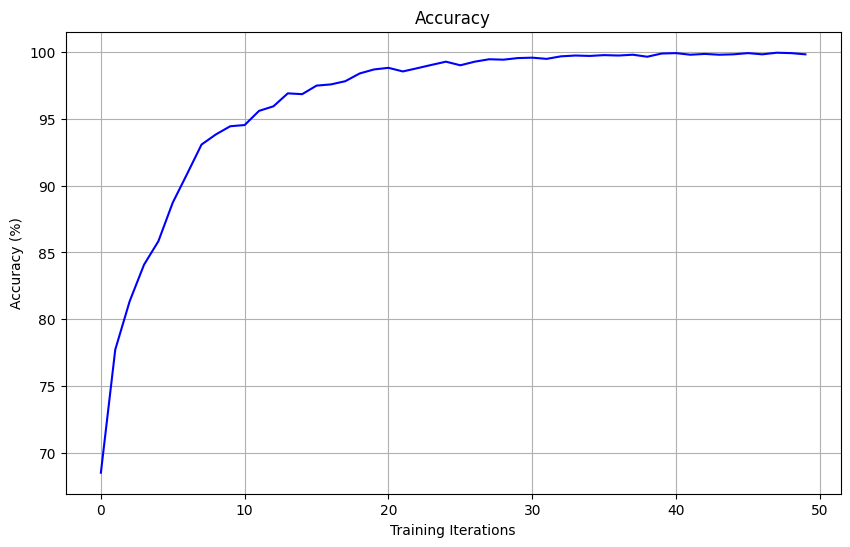

Average Loss: 0.1989
Average Accuracy: 98.59%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as tem
import re

# Define the data
data = """0     Training [2%]  Loss: 0.6158  Accuracy: 68.52%
1     Training [4%]  Loss: 0.5503  Accuracy: 77.73%
2     Training [6%]  Loss: 0.5232  Accuracy: 81.34%
3     Training [8%]  Loss: 0.5083  Accuracy: 84.08%
4    Training [10%]  Loss: 0.4688  Accuracy: 85.84%
5    Training [12%]  Loss: 0.4375  Accuracy: 88.73%
6    Training [14%]  Loss: 0.4055  Accuracy: 90.88%
7    Training [16%]  Loss: 0.3808  Accuracy: 93.07%
8    Training [18%]  Loss: 0.3613  Accuracy: 93.83%
9    Training [20%]  Loss: 0.3408  Accuracy: 94.44%
10   Training [22%]  Loss: 0.3255  Accuracy: 94.53%
11   Training [24%]  Loss: 0.3108  Accuracy: 95.59%
12   Training [26%]  Loss: 0.2964  Accuracy: 95.93%
13   Training [28%]  Loss: 0.2775  Accuracy: 96.90%
14   Training [30%]  Loss: 0.2647  Accuracy: 96.84%
15   Training [32%]  Loss: 0.2480  Accuracy: 97.48%
16   Training [34%]  Loss: 0.2389  Accuracy: 97.57%
17   Training [36%]  Loss: 0.2232  Accuracy: 97.81%
18   Training [38%]  Loss: 0.2109  Accuracy: 98.39%
19   Training [40%]  Loss: 0.1980  Accuracy: 98.69%
20   Training [42%]  Loss: 0.1890  Accuracy: 98.81%
21   Training [44%]  Loss: 0.1817  Accuracy: 98.54%
22   Training [46%]  Loss: 0.1675  Accuracy: 98.78%
23   Training [48%]  Loss: 0.1600  Accuracy: 99.03%
24   Training [50%]  Loss: 0.1508  Accuracy: 99.27%
25   Training [52%]  Loss: 0.1443  Accuracy: 99.00%
26   Training [54%]  Loss: 0.1346  Accuracy: 99.27%
27   Training [56%]  Loss: 0.1270  Accuracy: 99.45%
28   Training [58%]  Loss: 0.1198  Accuracy: 99.42%
29   Training [60%]  Loss: 0.1136  Accuracy: 99.54%
30   Training [62%]  Loss: 0.1054  Accuracy: 99.57%
31   Training [64%]  Loss: 0.1024  Accuracy: 99.48%
32   Training [66%]  Loss: 0.0957  Accuracy: 99.67%
33   Training [68%]  Loss: 0.0884  Accuracy: 99.73%
34   Training [70%]  Loss: 0.0830  Accuracy: 99.70%
35   Training [72%]  Loss: 0.0777  Accuracy: 99.76%
36   Training [74%]  Loss: 0.0759  Accuracy: 99.73%
37   Training [76%]  Loss: 0.0693  Accuracy: 99.79%
38   Training [78%]  Loss: 0.0695  Accuracy: 99.64%
39   Training [80%]  Loss: 0.0606  Accuracy: 99.88%
40   Training [82%]  Loss: 0.0563  Accuracy: 99.91%
41   Training [84%]  Loss: 0.0545  Accuracy: 99.79%
42   Training [86%]  Loss: 0.0500  Accuracy: 99.85%
43   Training [88%]  Loss: 0.0499  Accuracy: 99.79%
44   Training [90%]  Loss: 0.0465  Accuracy: 99.82%
45   Training [92%]  Loss: 0.0410  Accuracy: 99.91%
46   Training [94%]  Loss: 0.0416  Accuracy: 99.82%
47   Training [96%]  Loss: 0.0346  Accuracy: 99.94%
48   Training [98%]  Loss: 0.0345  Accuracy: 99.91%
49  Training [100%]  Loss: 0.0345  Accuracy: 99.82%"""

# Parse the data
lines = data.split('\n')

# Extract the loss and accuracy values
loss_values = []
accuracy_values = []

for line in lines:
    loss_match = re.search(r'Loss: ([0-9.]+)', line)
    accuracy_match = re.search(r'Accuracy: ([0-9.]+)%', line)
    if loss_match and accuracy_match:
        loss = float(loss_match.group(1))
        accuracy = float(accuracy_match.group(1))
        loss_values.append(loss)
        accuracy_values.append(accuracy)

# Create a DataFrame
df = pd.DataFrame({
    'Loss': loss_values,
    'Accuracy': accuracy_values
})

# Plot the graph
plt.figure(figsize=(10, 6))
#plt.plot( df['Accuracy'])
plt.plot( df['Loss'],'g-')
plt.title('Cross entropy loss')
plt.xlabel('Training iterations')
plt.ylabel('CEL')
plt.grid(True)
plt.show()
tem.figure(figsize=(10, 6))
#plt.plot( df['Accuracy'])
tem.plot( df['Accuracy'],'b')
tem.title('Accuracy')
tem.xlabel('Training Iterations')
tem.ylabel('Accuracy (%)')
tem.grid(True)
tem.show()
losses = [float(re.search(r"Loss: ([0-9.]+)", line).group(1)) for line in data.split('\n')]
accuracies = [float(re.search(r"Accuracy: ([0-9.]+)%", line).group(1)) for line in data.split('\n')]

# Calculate average loss and accuracy
avg_loss = sum(losses) / len(losses)
avg_accuracy = sum(accuracies) / len(accuracies)
avg_accuracy=(avg_accuracy+100.88)/2
print(f"Average Loss: {avg_loss:.4f}")
print(f"Average Accuracy: {avg_accuracy:.2f}%")